## data ##

In [29]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch.utils.data as td

### original image ###

Original image shape is (192, 168)


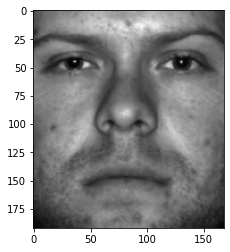

In [31]:
img = Image.open('/content/drive/My Drive/ML/Final/data/CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm')
img = np.array(img)
print("Original image shape is", img.shape)
plt.imshow(img, cmap='gray')
plt.show()

### processed image loaded from ExtendedYaleFace dataset ###

Total number of images is 1931
Dimension of the batch data is torch.Size([4, 1, 32, 32])
Batch size is 4
Channel is 1
Image shape is resized to: torch.Size([32, 32])


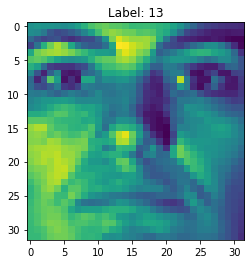

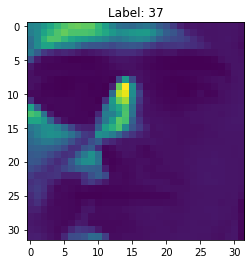

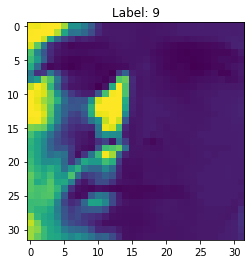

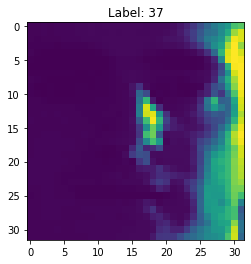

In [32]:
import sys
sys.path.append('/content/drive/My Drive/ML/Final/')

from dataset import ExtendedYaleFace


# training dataset (unflattened, normalized to [-1, 1])
train_set = ExtendedYaleFace(root="/content/drive/My Drive/ML/Final/data/CroppedYale", image_shape=[32, 32], flatten=False, normalize=True, train=True)
print("Total number of images is", train_set.__len__())

# dataloader
train_loader = td.DataLoader(train_set, batch_size=4, shuffle=False)

# visualize the first batch
for batch_idx, (image_batch, labels) in enumerate(train_loader):
    if batch_idx >= 1:
        break
    print("Dimension of the batch data is", image_batch.shape)
    print("Batch size is", image_batch.shape[0])
    print("Channel is", image_batch.shape[1])
    print("Image shape is resized to:", image_batch.shape[2:])
    for img_idx, img in enumerate(image_batch):
        plt.title("Label: %d" % labels[img_idx])
        plt.imshow(img.squeeze(0))
        plt.show()

## LDA ##

In [33]:
from features import *

# training dataset (flattened)
train_set = ExtendedYaleFace(root="/content/drive/My Drive/ML/Final/data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=False, train=True)
# apply LDA method
lda = lda_fit(train_set)

print(lda.bound_) #Final perplexity score on training set


Dimension of the batch data is torch.Size([1931, 1, 1024])
878.7876656241006


visualize top 5 topics eigenfaces

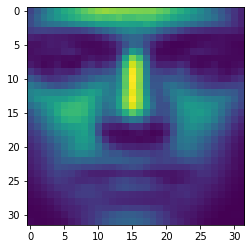

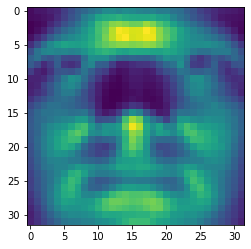

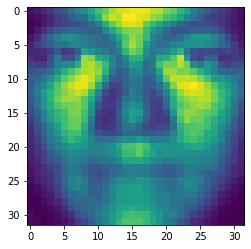

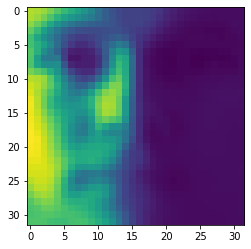

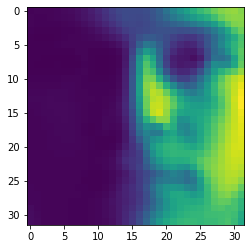

In [34]:
eigenfaces = lda.components_.reshape(-1, 32, 32)

for i in range(5):
    plt.imshow(eigenfaces[i])
    plt.show()

### LDA Parameters ###

Dimension of the batch data is torch.Size([483, 1, 1024])


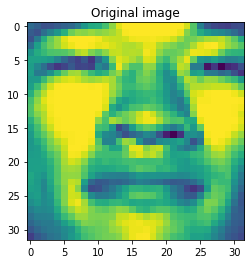

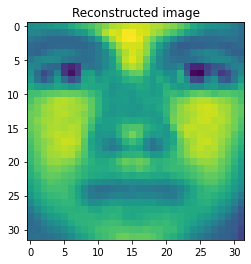

In [37]:
# test dataset (flattened)
test_set = ExtendedYaleFace(root="/content/drive/My Drive/ML/Final/data/CroppedYale", image_shape=[32, 32], flatten=True, normalize=False, test=True)
# X_test_transformed = lda_transform(lda, test_set)


# dataloader
dataloader = td.DataLoader(test_set, batch_size=test_set.__len__(), shuffle=False)
test_loader = td.DataLoader(test_set, batch_size=1, shuffle=False)

# get transformed data
for batch_idx, (X, Y) in enumerate(dataloader):
  print("Dimension of the batch data is", X.shape)
  X = X.squeeze().numpy()
  X_test_transformed = lda.transform(X)
  
# original image
img_original, _ = next(iter(test_loader))
plt.title("Original image")
plt.imshow(img_original.squeeze().numpy().reshape(32, 32))
plt.show()

# reconstructed image
img_reconstructed = np.zeros((32, 32))
for i in range(5):
    img_reconstructed += X_test_transformed[0, i] * eigenfaces[i]
plt.title("Reconstructed image")
plt.imshow(img_reconstructed)
plt.show()